# Проект: Принятие решений в бизнесе

## Описание проека

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовила список гипотез для увеличения выручки.

## Описание данных

### Данные для первой части

   Файл `/datasets/hypothesis.csv.`
   
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
### Данные для второй части

   Файл `/datasets/orders.csv.`
    
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

 Файл `/datasets/visitors.csv.`
     
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## Цель:

   - Приоритизировать гипотезы;
   - запустить A/B-тест;
   - проанализировать результаты.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задачи

   1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
   2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
   3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.   

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

Выполним предобработку данных

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В названиях колонок видны нарушения стиля:

    - строчные буквы сочетапются с прописными;
    - тип данных в столбцах с датой и временем не соответствует их значению

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [8]:
#orders['date'] = pd.to_datetime(orders['date'])
#visitors['date'] = pd.to_datetime(visitors['date'])

Названия в колонках привели в соответствие с "хорошим стилем". Проверим данные на пропуски:

In [9]:
for i in orders.columns:
    print(i, orders[i].isna().sum())

transaction_id 0
visitor_id 0
date 0
revenue 0
group 0


In [10]:
for i in hypothesis.columns:
    print(i, hypothesis[i].isna().sum())

hypothesis 0
reach 0
impact 0
confidence 0
efforts 0


In [11]:
for i in visitors.columns:
    print(i, visitors[i].isna().sum())

date 0
group 0
visitors 0


Пропусков в данных нет. Проверим теперь на наличие дубликатов.

In [12]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
visitors.duplicated().sum()

0
0


0

In [13]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [14]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [15]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Пропусков и дубликатов как явных, так и неявных не обнаружено. Данные готовы для дальнейшего изучения.

In [16]:
gr_a = orders[orders['group']=='A']['visitor_id'].unique()
gr_b = orders[orders['group']=='B'].query('visitor_id in @gr_a')['visitor_id']
gr_b = gr_b.unique()
orders = orders.query('visitor_id not in @gr_b')
orders['visitor_id'].nunique()

973

1. #### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [17]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
pd.set_option('display.max_colwidth', 500)

cm = sns.light_palette("green", as_cmap=True)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.background_gradient(cmap=cm)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


2. #### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [18]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
pd.set_option('display.max_colwidth', 500)

cm = sns.light_palette("green", as_cmap=True)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).style.background_gradient(cmap=cm)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


In [19]:
hypothesis['reach']

0     3
1     2
2     8
3     8
4     3
5     3
6     5
7    10
8     1
Name: reach, dtype: int64

3. #### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Наиболее перспективные гипотезы по ICE: 
   - "Запустить акцию, дающую скидку на товар в день рождения",
   - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
   - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
   
   
Наиболее перспективные гипотезы по RICE:

   - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
   - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
   - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
   - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".
   
   
   Набор гипотиз различается. Так получилось, потому что в RICE учитывается параметр Reach, этот параметр отвечает за охват пользователей которых затронет данное изменение. Гипотеза ***"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"*** по ICE находится на третьем месте, в то время как по RICE она на первом. Это говорит о том, что параметр RICE у нее 10, в то время как у других гипотез он меньше.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv.`

### Задача

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:

    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [20]:
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

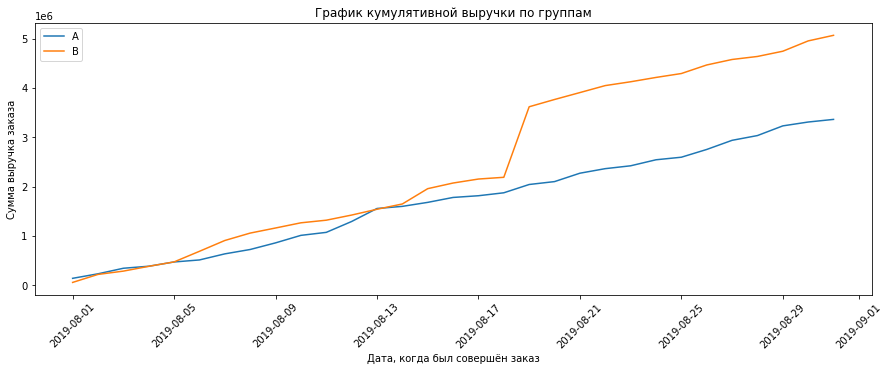

In [21]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата, когда был совершён заказ')
plt.ylabel('Сумма выручка заказа')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
В середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты.

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

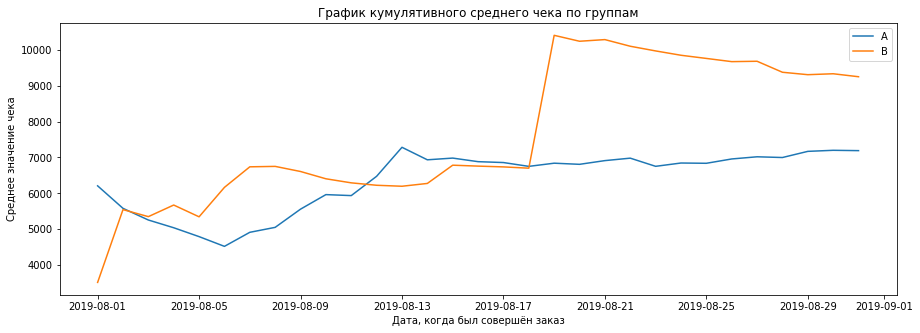

In [22]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата, когда был совершён заказ')
plt.ylabel('Среднее значение чека')
plt.legend()
plt.show()

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и после скачка продолжает падать для группы B. Возможно, в группу B середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
Кумулятивное значение среднего чека по сегментам продолжает колебаться.

#### 3.  Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

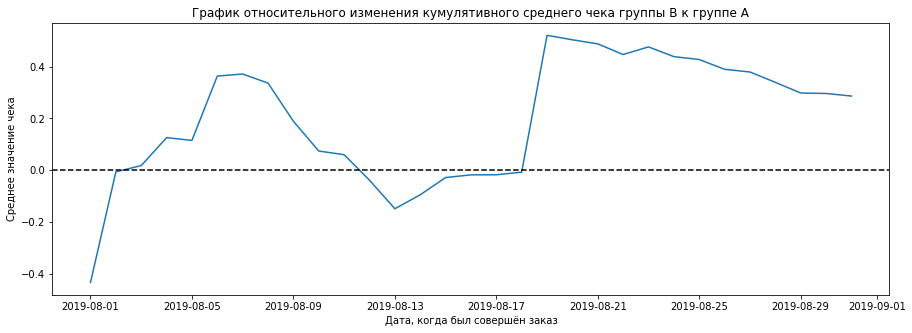

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата, когда был совершён заказ')
plt.ylabel('Среднее значение чека')
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

#### 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

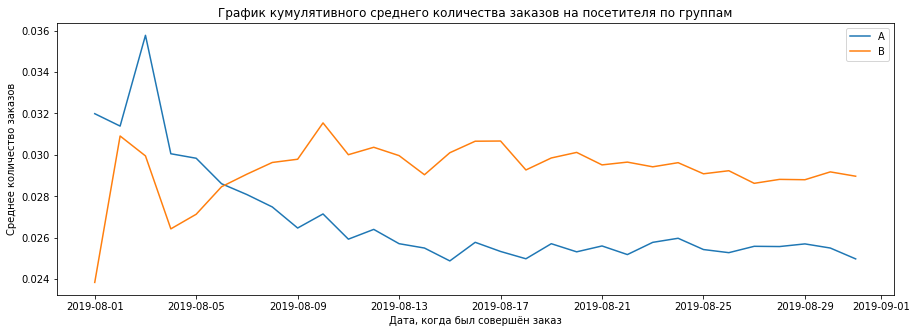

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата, когда был совершён заказ')
plt.ylabel('Среднее количество заказов')
plt.legend()
plt.show()

В начале теста сегмент A имел большую конверсию, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

#### 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

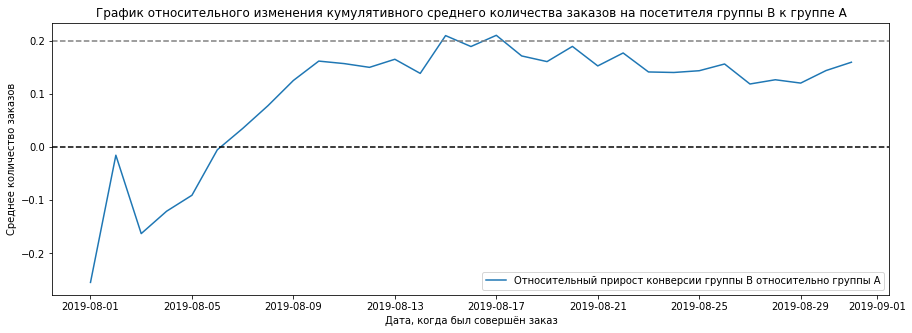

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата, когда был совершён заказ')
plt.ylabel('Среднее количество заказов')
plt.show()

Построили график относительного различия конверсии между группами.
Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 20% относительно группы A. Потом её конверсия снова падала, но теперь постепенно растёт. 

#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [26]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


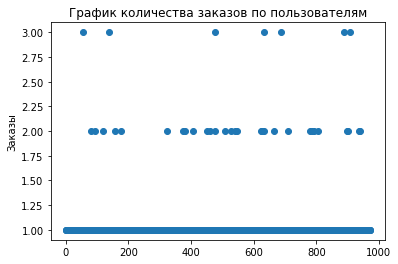

In [27]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Заказы')
plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 
2 заказа — нормально или много? Ответьте на этот вопрос, посчитав выборочные перцентили.

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказa. И 1% пользователей заказывали более двух раз. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [29]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


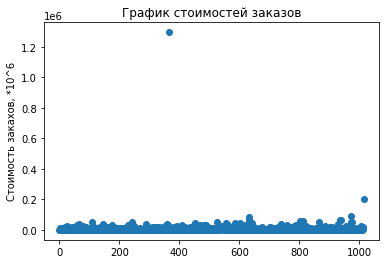

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость закахов, *10^6')
plt.show()

Заказов стоимостью 150 000 рублей не очень много. Есть выбросы в районе 200 000 рублей и в районе 1200 000 рублей. 
Заказ на 1,2 миллиона в интернет-магазине выглядит весьма аномально.
По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более, чем у 5% заказов чек дороже 26785 рублей. И не больше, чем у 1% заказов — дороже 53904 рублей. Примем за аномальных пользователей тех, кто совершил заказ на сумму свыше 40000 рублей, так как принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

#### 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная: статистически значемые различия в среднем количестве заказов на посетителя между группами есть.

In [32]:
import scipy.stats as stats

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    (
        data['ordersPerDateB'].sum()/
        data['visitorsPerDateB'].sum())/
    (data['ordersPerDateA'].sum()/
     data['visitorsPerDateA'].sum())-1)
     )

p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулквая гипотеза: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.
Альтернативная: статистически значемые различия в среднем чеке заказа между группами по «сырым» данным есть.

In [33]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


Первое число — p-value = 0.829 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Однако относительный различие среднего чека между сегментами равен 28,7%.

#### 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Сначала очистим данные от аномалий. 
Напомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя. 
Примем за аномальных пользователей тех, кто совершил 2 заказа и более и совершил заказ на сумму свыше 40 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. Сделаем срезы пользователей с числом заказов больше 2 и пользователей, совершивших заказы дороже 40 000. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64
30


Всего 30 аномальных пользователей. После их удаления будет пора считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.
Посчитайте статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

Нулквая гипотеза: статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» даннымнет нет.
Альтернативная: статистически значемые различия в среднем количестве заказов на посетителя между группами по «очищенным» даннымнет есть.

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.004
Относительный показатель 'B' и 'A' = 0.205


Как и в случае с сырыми данными, статистическая значимость достигнута. Нулевую гипотезу отвергаем. Это говрит о том, что по "очищенным" данным есть различие в среднем количестве заказов между группами. Сегмент B значительно лучше сегмента A.

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулквая гипотеза: статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. 

Альтернативная: статистически значемые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [36]:
print(
    "p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.937
Относительный показатель 'B' и 'A' = 0.055


P-value увеличился, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "Сырыми" данными). Но и разница между сегментами сократилась с 25.9% до 5.5%. Это значит, что после удаления выбросов в данных меньше шума.

#### 14. Примите решение по результатам теста и объясните его. Варианты решений:

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Имеющиеся факты:

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Относительный прирост среднего группы B к конверсии группы A по "очищенным" данным 20.5%;

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше A. Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 20% относительно группы A. Потом её конверсия снова падала, но теперь постепенно растёт:

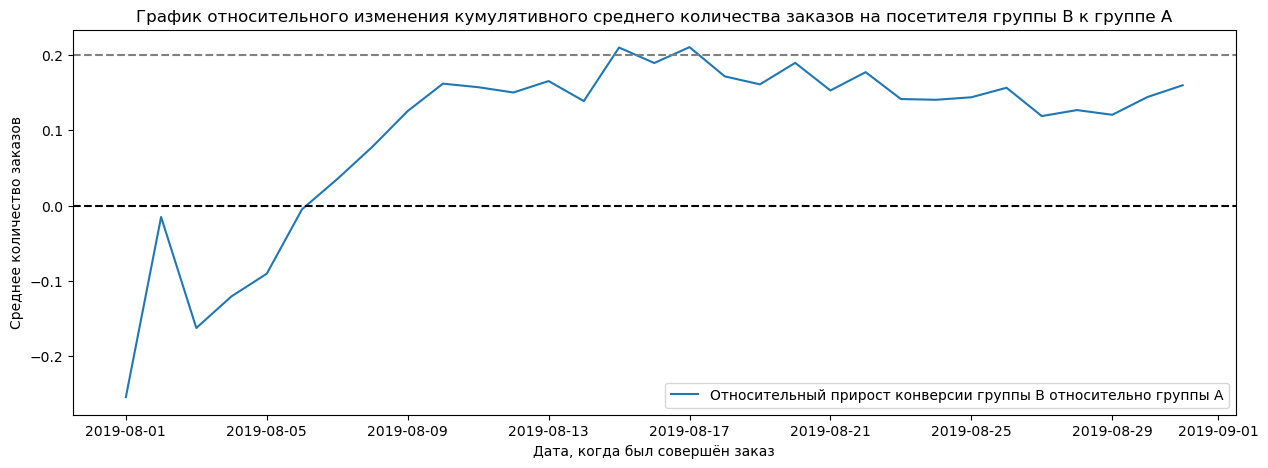


- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя:


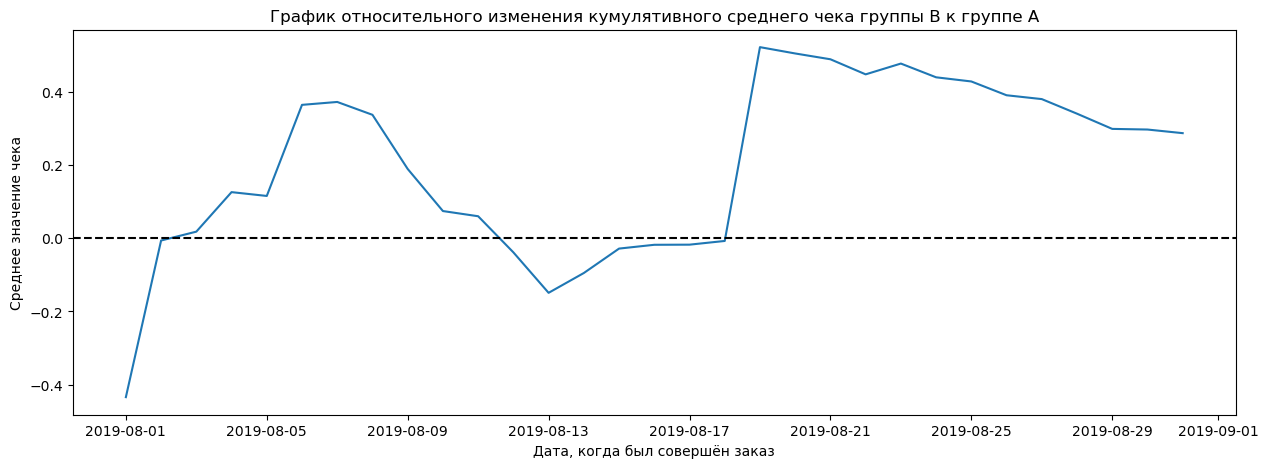


Исходя из фактов выше можно принять решение остановить тест, признать его успешным. Группа В оказалась успешнее группы А по конверсии. По среднему чеку группы оказались примерно равны.